In [3]:
# Install system dependencies for audio libraries like simpleaudio
!apt-get update -qq && apt-get install -y portaudio19-dev > /dev/null

!pip install soundfile simpleaudio
!pip install librosa scipy
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import simpleaudio as sa

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
  Using cached simpleaudio-1.0.4.tar.gz (2.0 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp312-cp312-linux_x86_64.whl size=2054644 sha256=8445d0e483afff1d7666580a2818313b9d5095a777520b344ee9337b9ccbd2a7
  Stored in directory: /root/.cache/pip/wheels/1d/ad/93/be934a93f1ba8922256840f1cf0e59f8a21e2539985616b64f
Successfully built simpleaudio


In [6]:
fs, signal = read("speech.wav")   # Replace with your file name

# Convert stereo to mono if needed
if signal.ndim > 1:
    signal = signal[:, 0]

signal = signal.astype(np.float32)

print("Sample Rate:", fs)
print("Total Samples:", len(signal))

Saving output.wav to output.wav


In [7]:
from scipy.io.wavfile import read

sampling_rate, audio_data = read("output.wav")

print("Sampling Rate:", sampling_rate, "Hz")
print("Bit Depth:", audio_data.dtype)

Sampling Rate: 44100 Hz
Bit Depth: int16


In [8]:
from google.colab import files
uploaded = files.upload()

Saving LJ050-0274.wav to LJ050-0274.wav


In [9]:
fs, signal = read("LJ050-0274.wav")   # Replace with your file name

# Convert stereo to mono if needed
if signal.ndim > 1:
    signal = signal[:, 0]

signal = signal.astype(np.float32)

print("Sample Rate:", fs)
print("Total Samples:", len(signal))

Sample Rate: 22050
Total Samples: 99229


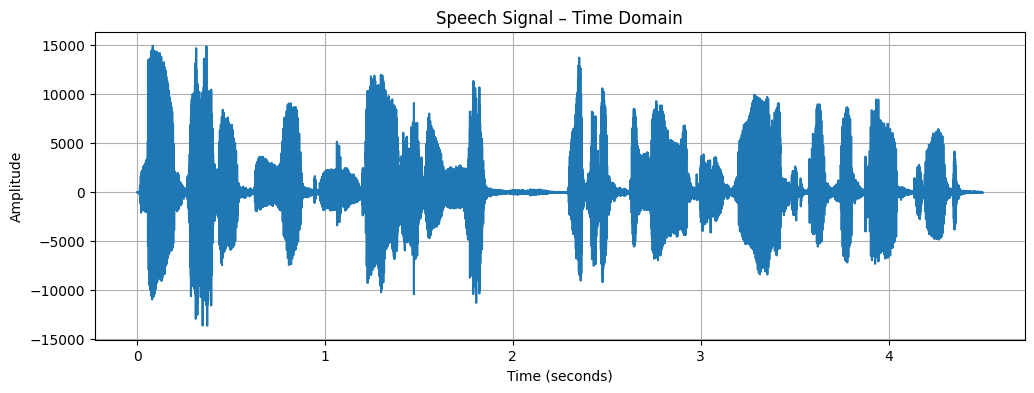

In [10]:
#Plot the waveform of speech signal (time-domain signal).

time = np.arange(len(signal)) / fs
plt.figure(figsize=(12,4))
plt.plot(time, signal)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Speech Signal – Time Domain")
plt.grid()
plt.show()


In [11]:
num_samples = len(signal)
duration = num_samples / fs

print("Sample Rate:", fs, "Hz")
print("Number of Samples:", num_samples)
print("Total Duration:", round(duration, 2), "seconds")

energy = signal**2
threshold = 0.01 * np.max(energy)   # silence threshold

active_samples = energy > threshold
active_duration = np.sum(active_samples) / fs

print("Active Speech Duration:", round(active_duration, 2), "seconds")


Sample Rate: 22050 Hz
Number of Samples: 99229
Total Duration: 4.5 seconds
Active Speech Duration: 1.36 seconds


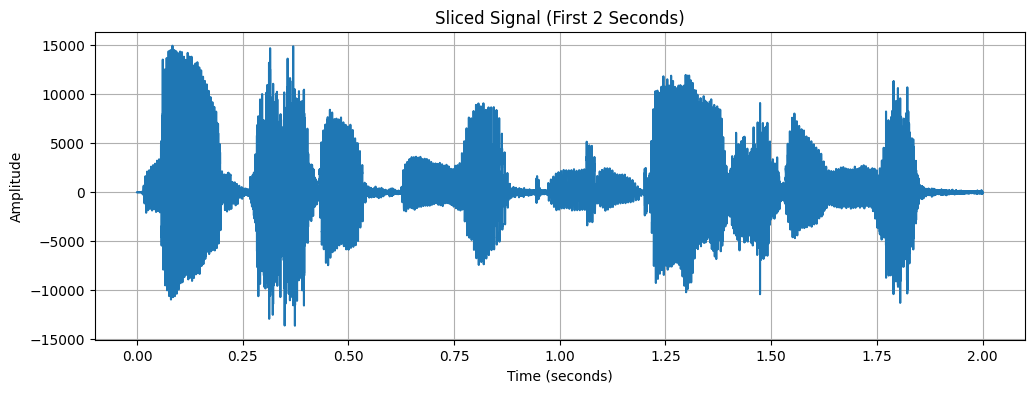

In [12]:
#1.Slicing (First 2 seconds)
slice_samples = int(2 * fs)
sliced_signal = signal[:slice_samples]

time_slice = np.arange(len(sliced_signal)) / fs

plt.figure(figsize=(12,4))
plt.plot(time_slice, sliced_signal)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Sliced Signal (First 2 Seconds)")
plt.grid()
plt.show()


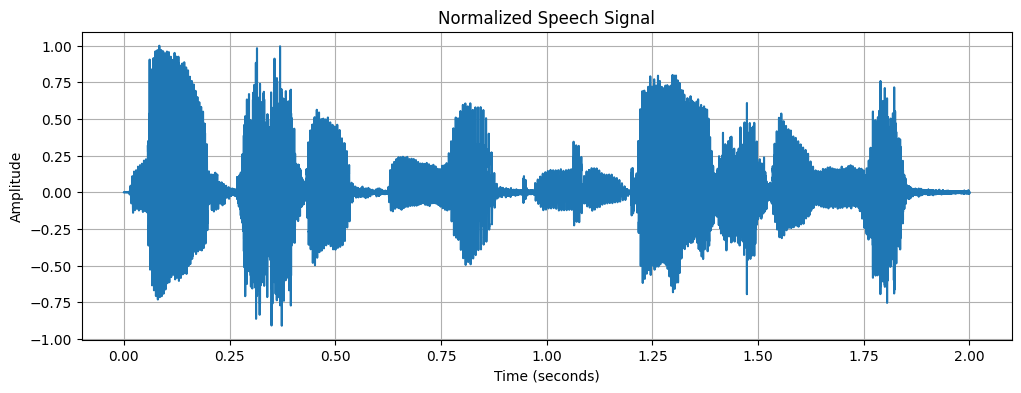

In [13]:
#Normalization
normalized_signal = sliced_signal / np.max(np.abs(sliced_signal))

plt.figure(figsize=(12,4))
plt.plot(time_slice, normalized_signal)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Normalized Speech Signal")
plt.grid()
plt.show()


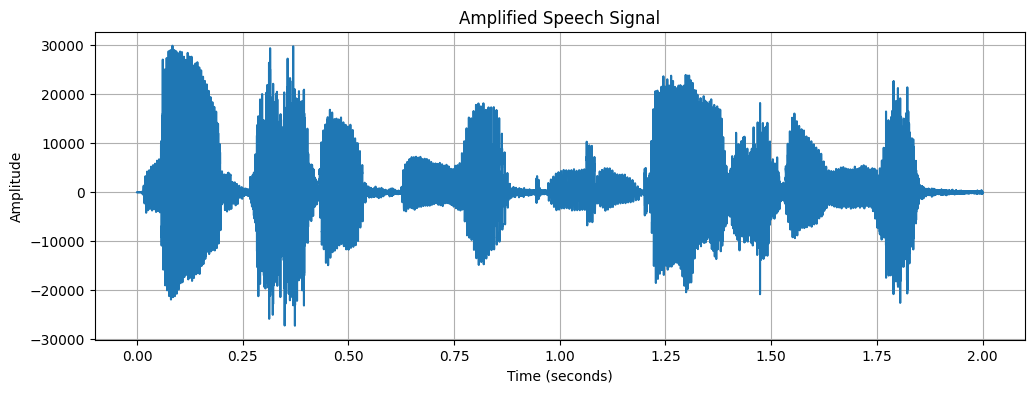

In [14]:
#Amplification
amplified = 2 * sliced_signal

plt.figure(figsize=(12,4))
plt.plot(time_slice, amplified)
plt.title("Amplified Speech Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


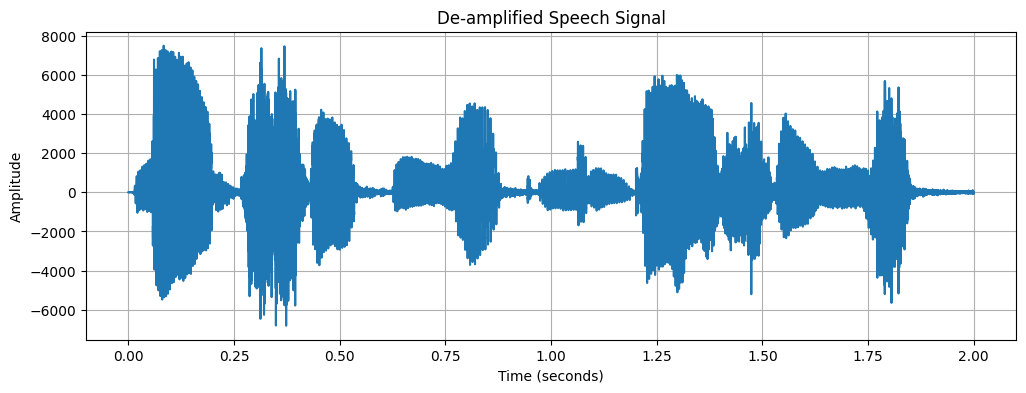

In [15]:
#De-amplification
de_amplified = 0.5 * sliced_signal

plt.figure(figsize=(12,4))
plt.plot(time_slice, de_amplified)
plt.title("De-amplified Speech Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


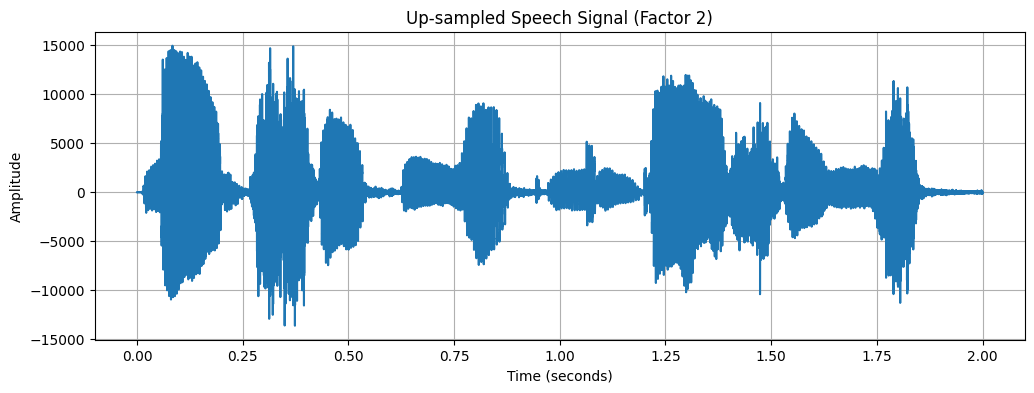

In [16]:
#Up-sampling (Factor = 2)
upsampled = np.repeat(sliced_signal, 2)
time_up = np.arange(len(upsampled)) / (2 * fs)

plt.figure(figsize=(12,4))
plt.plot(time_up, upsampled)
plt.title("Up-sampled Speech Signal (Factor 2)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


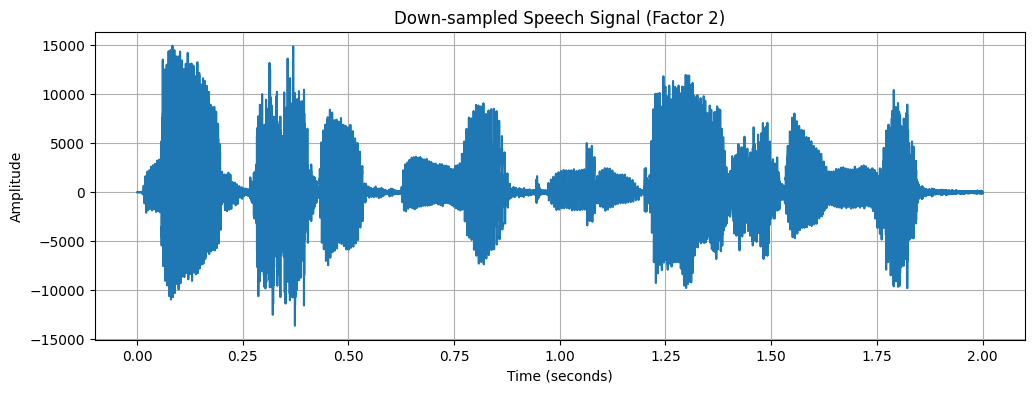

In [17]:
#Down-sampling (Factor = 2)
downsampled = sliced_signal[::2]
time_down = np.arange(len(downsampled)) / (fs / 2)

plt.figure(figsize=(12,4))
plt.plot(time_down, downsampled)
plt.title("Down-sampled Speech Signal (Factor 2)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


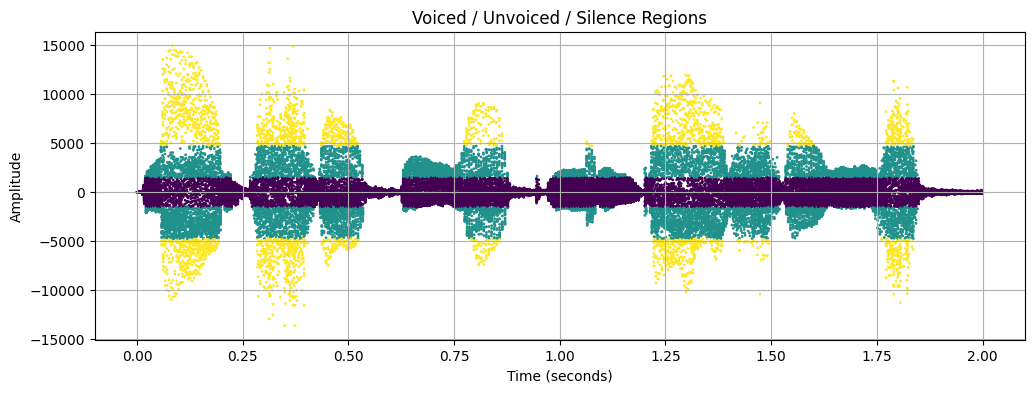

In [18]:
#Energy-based classification
energy_slice = sliced_signal**2

silence_th = 0.01 * np.max(energy_slice)
voiced_th = 0.1 * np.max(energy_slice)

labels = np.zeros(len(energy_slice))

labels[energy_slice < silence_th] = 0       # Silence
labels[(energy_slice >= silence_th) & (energy_slice < voiced_th)] = 1  # Unvoiced
labels[energy_slice >= voiced_th] = 2       # Voiced

plt.figure(figsize=(12,4))
plt.scatter(time_slice, sliced_signal, c=labels, cmap="viridis", s=1)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Voiced / Unvoiced / Silence Regions")
plt.grid()
plt.show()

